 # Classification SVM linéaire

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

In [51]:
iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2) # iris virginica

In [52]:
iris.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [53]:
iris.target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

Modèle avec l'hyperparamètre de régularisation (C) à 1 pour obtenir une marge plus large

In [54]:
svm_clf = make_pipeline(StandardScaler(), LinearSVC(C=1, random_state=42))
svm_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

In [55]:
X_new = [[5.5,1.7], [5.0,1.5]]
svm_clf.predict(X_new)

array([ True, False])

La première plante est classée comme iris virginica mais pas la deuxième

### Score de prédiction

In [56]:
svm_clf.decision_function(X_new)

array([ 0.66163816, -0.22035761])

C:\Users\nico_\AppData\Local\Temp\ipykernel_24196\81811088.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired, edgecolor='black', s


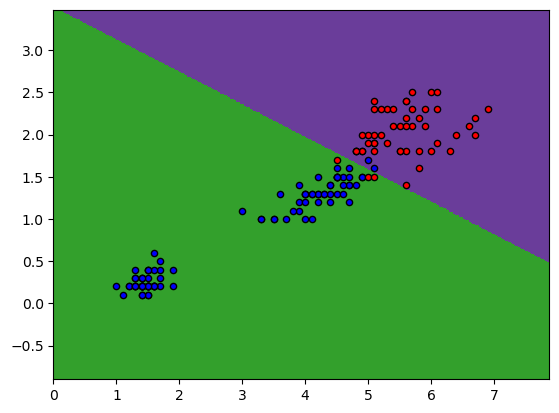

In [57]:
h = .02 
colors = "bry" 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) 
 
Z = svm_clf.predict(np.c_[xx.ravel(), yy.ravel()]) 
Z = Z.reshape(xx.shape) 
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired) 
plt.axis('tight') 
 
for i, color in zip(svm_clf.classes_, colors): 
 idx = np.where(y == i) 
 plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired, edgecolor='black', s
=20) 


# Classification non linéaire

In [58]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

In [59]:
X , y = make_moons(n_samples=100, noise=0.15, random_state=42)

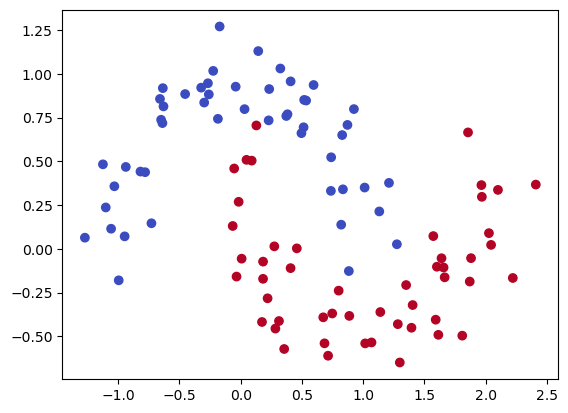

In [60]:
plt.scatter(X[:,0],X[:,1],c=y, cmap='coolwarm')

In [61]:
polynomial_svm_clf = make_pipeline(PolynomialFeatures(degree=3), StandardScaler(), LinearSVC(C=10, max_iter=10_000, random_state=42))

In [62]:
polynomial_svm_clf.fit(X,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, max_iter=10000, random_state=42))])

C:\Users\nico_\AppData\Local\Temp\ipykernel_24196\3987927356.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired, edgecolor='black', s


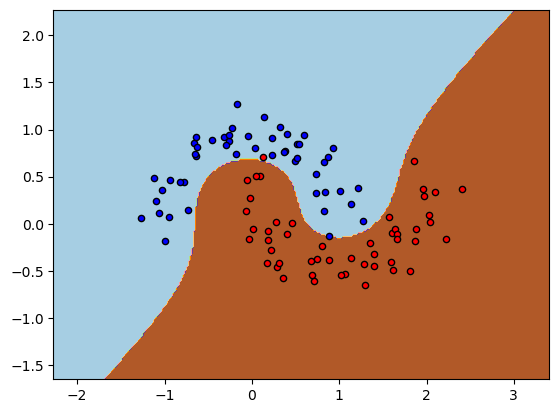

In [63]:
h = .02 
colors = "bry" 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) 
 
Z = polynomial_svm_clf.predict(np.c_[xx.ravel(), yy.ravel()]) 
Z = Z.reshape(xx.shape) 
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired) 
plt.axis('tight') 
 
for i, color in zip(polynomial_svm_clf.classes_, colors): 
 idx = np.where(y == i) 
 plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired, edgecolor='black', s
=20) 

### Noyau polynomial

Avec un polynome de degré très élevé, on peut tirer partie de jeux de données très complexe mais celà ralentit le traitement. 
L'astuce du noyau permet d'obtenir le même résultat comme si nous avions de nombreuses variables polynomiales. On utilise SVC.

In [64]:
from sklearn.svm import SVC

### degree=3, coef0=1, C=5

In [67]:
poly_kernel_svm_clf = make_pipeline(StandardScaler(), SVC(kernel='poly', degree=3, coef0=1, C=5))
poly_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

coef0 contrôle l'influence relative sur le modèle des termes de degré élevé par rapoort aux termes de faible degré.

C:\Users\nico_\AppData\Local\Temp\ipykernel_24196\4269481838.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired, edgecolor='black', s


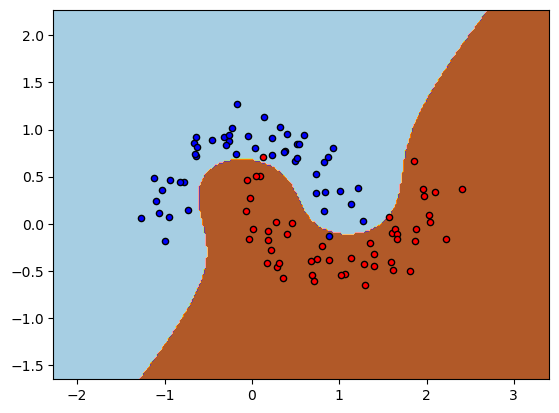

In [68]:
h = .02 
colors = "bry" 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) 
 
Z = poly_kernel_svm_clf.predict(np.c_[xx.ravel(), yy.ravel()]) 
Z = Z.reshape(xx.shape) 
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired) 
plt.axis('tight') 
 
for i, color in zip(poly_kernel_svm_clf.classes_, colors): 
 idx = np.where(y == i) 
 plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired, edgecolor='black', s
=20)

### degree=10, coef0=100, C=5

In [69]:
poly_kernel_svm_clf = make_pipeline(StandardScaler(), SVC(kernel='poly', degree=10, coef0=100, C=5))
poly_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

C:\Users\nico_\AppData\Local\Temp\ipykernel_24196\4269481838.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired, edgecolor='black', s


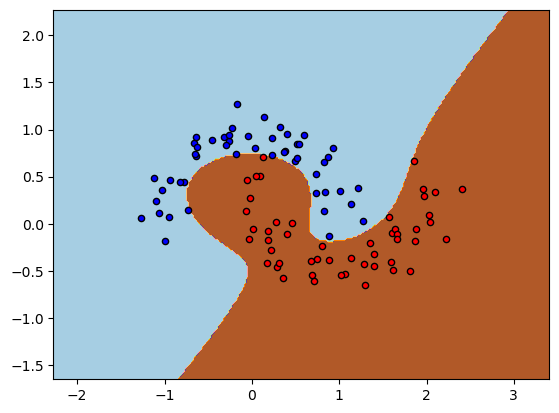

In [70]:
h = .02 
colors = "bry" 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) 
 
Z = poly_kernel_svm_clf.predict(np.c_[xx.ravel(), yy.ravel()]) 
Z = Z.reshape(xx.shape) 
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired) 
plt.axis('tight') 
 
for i, color in zip(poly_kernel_svm_clf.classes_, colors): 
 idx = np.where(y == i) 
 plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired, edgecolor='black', s
=20)

### Variables de similarité

Ajout de variables calculées à l'aide de la focntion de similarité qui mesure la ressemblance entre chaque observation et un point de repère. Celà crée un grand nombre de dimensions et accroît les chances d'obtenir que le jeu de données transformé soiut linéairement séparables.
Par contre, cette méthode est très coûteuse informatiquement. L'astuce du noyau fonctionne dans ce cas permettant d'obtenir des résultats semblables.
SVC est utilisé avec le noyau radial gaussien (RBF). A chaque point de repère, une courbe gaussienne est tracé. La courbe varie de 0 (loin du point de repère) et 1, partie supérieure de la courbe (au poiunt de repère)

### gamma=5, C=0.001

In [71]:
rbf_kernel_svm_clf = make_pipeline(StandardScaler(), SVC(kernel='rbf', gamma=5, C=0.001))
rbf_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.001, gamma=5))])

C:\Users\nico_\AppData\Local\Temp\ipykernel_24196\2186661126.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired, edgecolor='black', s


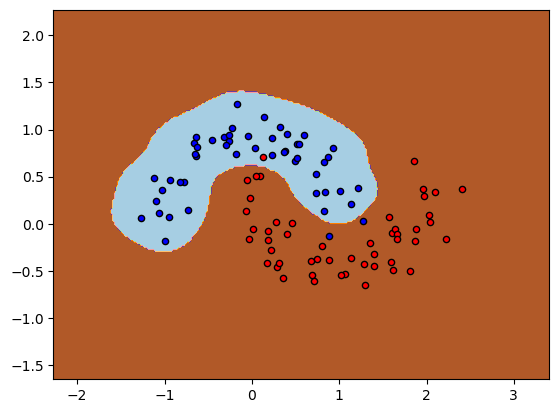

In [72]:
h = .02 
colors = "bry" 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) 
 
Z = rbf_kernel_svm_clf.predict(np.c_[xx.ravel(), yy.ravel()]) 
Z = Z.reshape(xx.shape) 
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired) 
plt.axis('tight') 
 
for i, color in zip(rbf_kernel_svm_clf.classes_, colors): 
 idx = np.where(y == i) 
 plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired, edgecolor='black', s
=20)

### gamma=0.1, C=0.001

In [73]:
rbf_kernel_svm_clf = make_pipeline(StandardScaler(), SVC(kernel='rbf', gamma=0.1, C=0.001))
rbf_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.001, gamma=0.1))])

C:\Users\nico_\AppData\Local\Temp\ipykernel_24196\2186661126.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired, edgecolor='black', s


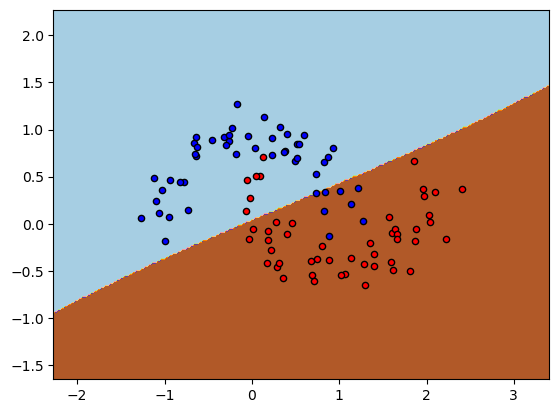

In [74]:
h = .02 
colors = "bry" 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) 
 
Z = rbf_kernel_svm_clf.predict(np.c_[xx.ravel(), yy.ravel()]) 
Z = Z.reshape(xx.shape) 
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired) 
plt.axis('tight') 
 
for i, color in zip(rbf_kernel_svm_clf.classes_, colors): 
 idx = np.where(y == i) 
 plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired, edgecolor='black', s
=20)

### gamma=5, C=1000

In [75]:
rbf_kernel_svm_clf = make_pipeline(StandardScaler(), SVC(kernel='rbf', gamma=5, C=1000))
rbf_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1000, gamma=5))])

C:\Users\nico_\AppData\Local\Temp\ipykernel_24196\2186661126.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired, edgecolor='black', s


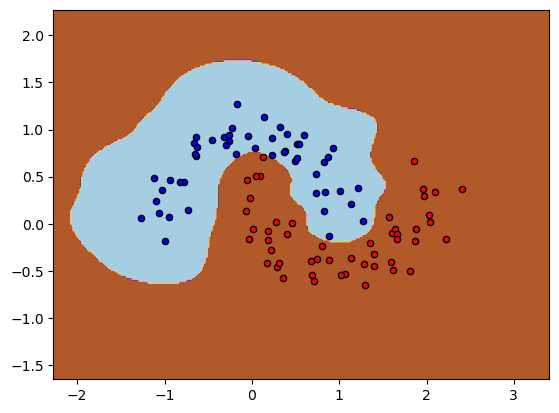

In [76]:
h = .02 
colors = "bry" 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) 
 
Z = rbf_kernel_svm_clf.predict(np.c_[xx.ravel(), yy.ravel()]) 
Z = Z.reshape(xx.shape) 
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired) 
plt.axis('tight') 
 
for i, color in zip(rbf_kernel_svm_clf.classes_, colors): 
 idx = np.where(y == i) 
 plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired, edgecolor='black', s
=20)

### gamma=0.1, C=1000

In [77]:
rbf_kernel_svm_clf = make_pipeline(StandardScaler(), SVC(kernel='rbf', gamma=0.1, C=1000))
rbf_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1000, gamma=0.1))])

C:\Users\nico_\AppData\Local\Temp\ipykernel_24196\2186661126.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired, edgecolor='black', s


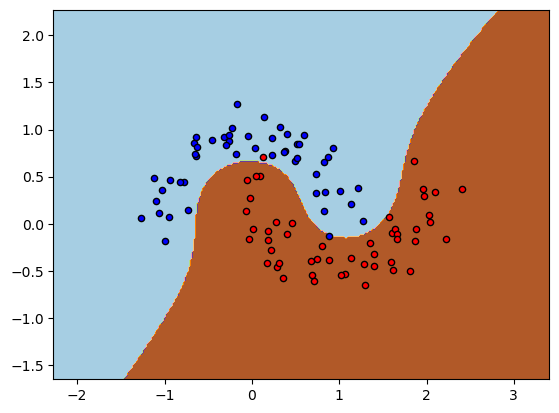

In [78]:
h = .02 
colors = "bry" 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) 
 
Z = rbf_kernel_svm_clf.predict(np.c_[xx.ravel(), yy.ravel()]) 
Z = Z.reshape(xx.shape) 
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired) 
plt.axis('tight') 
 
for i, color in zip(rbf_kernel_svm_clf.classes_, colors): 
 idx = np.where(y == i) 
 plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired, edgecolor='black', s
=20)

L'augmentation du gamma permet d'obtenir une courbe en clôche plus étroite et par conséquent diminue l'intervalle d'influence de chaque observation, la frontière de décision se propage entre les observations.
La diminution du gamma élargie la courbe en clôche et par conséquent augmente la zone d'influence de chaque observation ce qui lisse la frontière de décision.
Si le modèle surajuste, le gamma doit être réduit et si le modèle sous-ajuste, le gamma doit être augmenté comme l'hyperparametre C.

# Régression SVM

In [237]:
from sklearn.svm import LinearSVR

In [238]:
from sklearn.datasets import fetch_california_housing

In [392]:
data = fetch_california_housing()

In [393]:
print(data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [394]:
data.target_names

['MedHouseVal']

In [395]:
data_features = pd.DataFrame(data.data, columns=data.feature_names)

In [396]:
data_target = pd.DataFrame(data.target, columns=data.target_names)

In [397]:
data = pd.concat([data_features, data_target], axis=1)

In [398]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [399]:
data.shape

(20640, 9)

Avec plus de 20 000 observations, les SVM vont être lents. Nous allons donc sélectionner les 2500 premières observations 

In [400]:
data = data[:2500]

In [401]:
data.shape

(2500, 9)

In [402]:
data.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [403]:
data.duplicated().sum()

0

In [404]:
data.dtypes

MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object

In [405]:
from sklearn.model_selection import train_test_split

In [406]:
X = data.drop(['MedHouseVal'],axis=1)

In [407]:
y =  data["MedHouseVal"]

In [408]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [409]:
print(X_train.shape)
print(X_test.shape)

(2000, 8)
(500, 8)


### epsilon = 0.5

In [410]:
svm_reg = make_pipeline(StandardScaler(), LinearSVR(epsilon=0.5, random_state=42))
svm_reg.fit(X_train, y_train)

C:\Users\nico_\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR(epsilon=0.5, random_state=42))])

Pas de convergence. Nous allons augmenter les itérations

In [411]:
svm_reg = make_pipeline(StandardScaler(), LinearSVR(max_iter=5000, dual=True,epsilon=0.5, random_state=42))
svm_reg.fit(X_train, y_train)   

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr',
                 LinearSVR(dual=True, epsilon=0.5, max_iter=5000,
                           random_state=42))])

In [412]:
y_pred = svm_reg.predict(X_test)
y_hat = svm_reg.predict(X_train)

In [413]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [414]:
print("rmse_test = ", np.square(mean_squared_error(y_test,y_pred)))
print("rmse_train = ", np.square(mean_squared_error(y_train,y_hat)))
print("mae_test = ", mean_absolute_error(y_test,y_pred))
print("mae_train = ", mean_absolute_error(y_train,y_hat))

rmse_test =  0.06089035291801394
rmse_train =  0.06551576643038959
mae_test =  0.3520947862522776
mae_train =  0.35891878219476075


In [415]:
print('model_score_train : ', svm_reg.score(X_train,y_train))
print('model_score_test : ', svm_reg.score(X_test,y_test))

model_score_train :  0.7312442300062989
model_score_test :  0.7353712067900562


### epsilon = 1.2

In [416]:
svm_reg = make_pipeline(StandardScaler(), LinearSVR(max_iter=5000, dual=True,epsilon=1.2, random_state=42))
svm_reg.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr',
                 LinearSVR(dual=True, epsilon=1.2, max_iter=5000,
                           random_state=42))])

In [417]:
y_pred = svm_reg.predict(X_test)
y_hat = svm_reg.predict(X_train)

In [418]:
print("rmse_test = ", np.square(mean_squared_error(y_test,y_pred)))
print("rmse_train = ", np.square(mean_squared_error(y_train,y_hat)))
print("mae_test = ", mean_absolute_error(y_test,y_pred))
print("mae_train = ", mean_absolute_error(y_train,y_hat))

print('model_score_train : ', svm_reg.score(X_train,y_train))
print('model_score_test : ', svm_reg.score(X_test,y_test))

rmse_test =  0.15783394315311777
rmse_train =  0.19556550493079947
mae_test =  0.538122085411446
mae_train =  0.5613354369537451
model_score_train :  0.5356654380297923
model_score_test :  0.5739475628222864


La réduction d'epsilon réduit le nombre de vecteurs support, ce qui régularise le modèle. Le modèle avec un epsilon à 0.5 est plus performant que celui avec un epsilon plus élevé.

### Sans epsilon

In [419]:
svm_reg = make_pipeline(StandardScaler(), LinearSVR(max_iter=5000, dual=True, random_state=42))
svm_reg.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr',
                 LinearSVR(dual=True, max_iter=5000, random_state=42))])

In [420]:
y_pred = svm_reg.predict(X_test)
y_hat = svm_reg.predict(X_train)

In [421]:
print("rmse_test = ", np.square(mean_squared_error(y_test,y_pred)))
print("rmse_train = ", np.square(mean_squared_error(y_train,y_hat)))
print("mae_test = ", mean_absolute_error(y_test,y_pred))
print("mae_train = ", mean_absolute_error(y_train,y_hat))

print('model_score_train : ', svm_reg.score(X_train,y_train))
print('model_score_test : ', svm_reg.score(X_test,y_test))

rmse_test =  0.08018839949280797
rmse_train =  0.0709133564408701
mae_test =  0.35365674154258114
mae_train =  0.3523489613185577
model_score_train :  0.7203924430555029
model_score_test :  0.6963182990052965
